In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
HTML('<link rel="stylesheet" type="text/css" href="extra/custom_style.css">')

<hr>

**<h1><b> CS437/CS5317/EE414/EE513 Deep Learning | <span style="color: #FFC72C;"> PA4</span></b></h1>**

<hr>

# <span style="color: #FFC72C;">**Submission Guidelines**</span>

- <span style="color: #DA291C;">Please rename the file to `<RollNumber>_PA4_2`.</span>
- <span style="color: #DA291C;">Please also submit a **.py** file of every Notebook. You can do this by exporting your **ipynb** to a Python script.</span>
- <span style="color: #DA291C;">Please submit a zipped folder of both your Jupyter Notebooks and Python script files.</span>

In [1]:
import math
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
from tqdm import tqdm
!pip install datasets
from datasets import load_dataset
from typing import Tuple
import re
import numpy as np
import pandas as pd
!pip3 install tiktoken
import tiktoken
import nltk
from dataclasses import dataclass
from nltk.corpus import stopwords
nltk.download('stopwords')
# torch.set_default_device('cuda')
# torch.set_default_device('mps')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
Name = Muhammad Ahmad
Roll_Number = 26100398

SyntaxError: invalid syntax (<ipython-input-3-8cacf9db6255>, line 1)

<hr>

# <h1> <span style="color:#FFC72C;">**Part 2**</span> | <span style="color: #C0C0C0; font-family: Transformers"> Transformers </span>| <span style="color:#DA291C; font-family: Montserrat"> **75 Marks**</span></h1>  

<hr>

<h3 style="color: #FFC72C;">A Tale of Transformation: From Data Wars to the Last Knight</h3>

<p>
In an era where data was scattered like remnants of forgotten battles, a new hero emerged—much like the legendary warriors from the blockbuster <i>Transformers: The Last Knight</i>. This was no ordinary hero; it was a groundbreaking model that redefined how machines understand language and imagery.
</p>

<p>
Much like the courageous knights fighting to restore honor in a chaotic world, our Transformer model was forged in the fires of innovation. Born from the visionary ideas of Vaswani et al. in <b>"Attention Is All You Need"</b>, it wielded the power of self-attention—a magic that allowed it to see connections across vast expanses of data, transforming confusion into clarity.
</p>

<p>
In a realm where traditional methods faltered, the model stood as a bulwark against disorder. Its layers of encoders and decoders resembled the valiant legions of ancient knights, each unit collaborating to unlock the secrets hidden within streams of raw information. Every token, like a soldier on a battlefield, found its rightful place, ensuring that no detail was lost in the chaos.
</p>

<p>
The saga was one of evolution and resilience. As the model learned to capture context and meaning with every iteration, it mirrored the epic struggles seen in <i>Transformers: The Last Knight</i>—where ancient legacies clashed with modern threats, and heroes rose to defend a future worth fighting for.
</p>

<p>
In this digital epic, the Transformer was not merely a tool but a legend reborn—a guardian of knowledge, destined to lead us into a new era where data and destiny converge. And so, the journey continues, as every byte of information is transformed into a beacon of insight, lighting the path to a smarter, more connected tomorrow.
</p>

<figure></figure>
  <img src="./extra/Prime.jpg" style="width:100%">

<h3>What is it?</h3>

<p>
The Transformer model, introduced in the paper <b>"Attention Is All You Need"</b> by Vaswani et al. (2017),
is an <b>encoder-decoder</b> neural network primarily used for sequence-to-sequence tasks like machine translation.
</p>

<ul>
    <li>The model consists of an <b>Encoder</b> and <b>Decoder</b>.</li>
    <li>Instead of recurrence (RNNs), it uses <b>self-attention</b> for global context.</li>
    <li>Parallelization enables faster training compared to RNNs.</li>
</ul>

<h3>Main Components</h3>

<h3 style="color: #FFC72C;">1. Input Embeddings & Positional Encoding</h3>

<ul>
    <li><b>Word Embeddings</b>: Converts words into vectors.</li>
    <li><b>Pixel Embeddings</b>: Converts pixels into vectors.</li>
    <li><b>Positional Encoding</b>: Adds position information to word embeddings.</li>
    <li><b>Tokens</b>: Represent input/output words in the model.</li>
</ul>

<h3 style="color: #FFC72C;">2. Encoder (N Layers)</h3>

<ul>
    <li><b>Multi-Head Self-Attention</b>: Captures relationships between all tokens.</li>
    <li><b>Feedforward Network (FFN)</b>: Adds non-linearity for better learning.</li>
    <li><b>Layer Normalization & Residual Connections</b>: Helps stable training.</li>
</ul>

<h3 style="color: #FFC72C;">3. Decoder (N Layers)</h3>

<ul>
    <li><b>Masked Multi-Head Attention</b>: Prevents peeking at future tokens.</li>
    <li><b>Cross-Attention</b>: Attends to encoder outputs.</li>
</ul>

<h3 style="color: #FFC72C;">4. Final Output</h3>

<p>- Decoder outputs logits for a <b>softmax</b> layer, generating predictions.</p>

<h3>Summary Table</h3>

<table>
    <tr>
        <th>Component</th>
        <th>Function</th>
    </tr>
    <tr>
        <td>Word Embeddings</td>
        <td>Converts tokens into dense vectors.</td>
    </tr>
    <tr>
        <td>Pixel Embeddings</td>
        <td>Converts pixels into dense vectors.</td>
    </tr>
    <tr>
        <td>Positional Encoding</td>
        <td>Adds sequence order information.</td>
    </tr>
    <tr>
        <td>Encoder</td>
        <td>Processes input sequences.</td>
    </tr>
    <tr>
        <td>Decoder</td>
        <td>Generates output sequences.</td>
    </tr>
    <tr>
        <td>Multi-Head Self-Attention</td>
        <td>Captures relationships between tokens.</td>
    </tr>
    <tr>
        <td>Feedforward Network (FFN)</td>
        <td>Applies transformations to token representations.</td>
    </tr>
    <tr>
        <td>Layer Normalization & Residuals</td>
        <td>Stabilizes training and improves gradient flow.</td>
    </tr>
    <tr>
        <td>Masked Attention (Decoder)</td>
        <td>Prevents looking at future words.</td>
    </tr>
    <tr>
        <td>Final Linear Layer & Softmax</td>
        <td>Converts hidden states into word probabilities.</td>
    </tr>
</table>

<figure>
    <img src="extra/figure1.png" alt="Transformer Architecture" style="width: 1200px;"/>
</figure>

<hr>

# <h1> <span style="color:#FFC72C;">**Task 1**</span> | <span style="color: #C0C0C0; font-family: Transformers"> basic Transformers </span>| <span style="color:#DA291C; font-family: Montserrat"> **25 Marks**</span></h1>  


<hr>

<h2 style="color: #FFC72C;">Task Overview</h2>
<p>
  In this assignment, you will build a Transformer-based language model using the script of the Transformers Movie (Your choice on the movie hehe).
  The goal is to implement and integrate key components of the Transformer architecture to perform text generation.
</p>

<h3 style="color: #FFC72C;">Key Components</h3>
<ul>
  <li><strong>TokenizedDataset</strong>: Reads, cleans, and tokenizes the movie script, providing batches for training.</li>
  <li><strong>Configuration</strong>: A dataclass that encapsulates hyperparameters such as block size, embedding dimension, head size, number of heads, and more.</li>
  <li><strong>MHA</strong>: Implements multi-head self-attention with a single QKV projection, causal masking, and dropout.</li>
  <li><strong>Feedforward</strong>: A three-layer feedforward network with GELU activations and dropout for improved regularization.</li>
  <li><strong>Block</strong>: Combines the MHA and Feedforward modules with pre-layer normalization and residual connections.</li>
  <li><strong>Decepticons</strong>: The full Transformer model that integrates word embeddings, positional encodings, stacked Blocks, and a final projection to generate vocabulary logits.</li>
  <li><strong>Trainer</strong>: Manages the training, evaluation, and autoregressive text generation processes, including gradient clipping and perplexity calculation.</li>
</ul>

<h3 style="color: #FFC72C;">Objective</h3>
<p>
  The objective is to train a Transformer model on the Transformers Movie script and use it to generate new text.
  You will implement each module, integrate them into a cohesive model, and then train and evaluate the model using a dedicated Trainer class.
</p>

<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **Tokenized Dataset** </span></h2>  

<hr>

<p>
  Preprocesses the Transformers Movie script by cleaning, normalizing, and tokenizing the text.
</p>

<h3 style="color: #FFC72C;">Args</h3>
<ul>
  <li><strong>path</strong>: Path to the text file.</li>
  <li><strong>batch_size</strong>: Number of samples per batch.</li>
  <li><strong>block_size</strong>: Length of each sample in tokens.</li>
  <li><strong>encoder_name</strong>: Encoder name (e.g., "gpt2").</li>
  <li><strong>additional_clean</strong>: (Optional) Apply extra cleaning.</li>
</ul>

<h3 style="color: #FFC72C;">Methods</h3>
<ul>
  <li>
    <strong>normalize(txt: str, additional_clean: bool) -&gt; str</strong>:
    Cleans text by removing newlines, punctuation, digits, URLs, and optionally more.
  </li>
  <li>
    <strong>batch() -&gt; Tuple[torch.Tensor, torch.Tensor]</strong>:
    Returns a random batch of input tokens <code>x</code> and target tokens <code>y</code> with shapes
    <code>(batch_size, block_size)</code>.
  </li>
</ul>

In [2]:

class TokenizedDataset:
    def __init__(self, path, batch_size, block_size, encoder_name: str = "gpt2", additional_clean: bool = True):
        """
        Initializes the TokenizedDataset by reading the script, normalizing the text,
        and tokenizing it using the specified tiktoken encoder.
        """
        self.batch_size = batch_size
        self.block_size = block_size

        # Load encoder
        self.encoder = tiktoken.get_encoding(encoder_name)

        # Read and normalize text
        with open(path, 'r', encoding='utf-8') as f:
            raw_text = f.read()
        cleaned_text = self.normalize(raw_text, additional_clean)

        # Tokenize
        self.tokens = self.encoder.encode(cleaned_text)

    def normalize(self, txt: str, additional_clean: bool = True) -> str:
        """
        Cleans the input text by removing newlines, punctuation, numbers, URLs,
        and more if additional_clean is True.
        """
        txt = txt.lower()
        txt = re.sub(r'https?://\S+', '', txt)         # Remove URLs
        txt = re.sub(r'\d+', '', txt)                 # Remove digits
        txt = re.sub(r'[^\w\s]', '', txt)             # Remove punctuation
        txt = re.sub(r'\s+', ' ', txt)                # Collapse whitespace
        if additional_clean:
            txt = re.sub(r'\b(scene|cut to|int\.|ext\.)\b', '', txt, flags=re.IGNORECASE)
        return txt.strip()

    def batch(self):
        """
        Returns a random batch of (x, y) from the tokenized script.
        """
        x = torch.zeros((self.batch_size, self.block_size), dtype=torch.long)
        y = torch.zeros((self.batch_size, self.block_size), dtype=torch.long)

        for i in range(self.batch_size):
            start_idx = random.randint(0, len(self.tokens) - self.block_size - 1)
            chunk = self.tokens[start_idx : start_idx + self.block_size + 1]
            x[i] = torch.tensor(chunk[:-1])
            y[i] = torch.tensor(chunk[1:])

        return x, y


<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **Configuration** </span></h2>  

<hr>

<p>
  Encapsulates hyperparameters for the Transformer model.
</p>

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li><strong>block_size</strong>: Sequence length (T).</li>
  <li><strong>emb_dim</strong>: Embedding dimension (C).</li>
  <li><strong>head_size</strong>: Dimension of each attention head.</li>
  <li><strong>num_heads</strong>: Number of attention heads.</li>
  <li><strong>num_layers</strong>: Number of transformer layers.</li>
  <li><strong>vocab_size</strong>: Size of the vocabulary.</li>
  <li><strong>attn_dropout</strong>: Dropout rate for attention weights.</li>
  <li><strong>proj_dropout</strong>: Dropout rate after output projection.</li>
  <li><strong>emb_dropout</strong>: Dropout rate for embeddings.</li>
</ul>

In [3]:

@dataclass
class Configuration:
    block_size: int        # Sequence length (T)
    emb_dim: int           # Embedding dimension (C)
    head_size: int         # Dimension of each attention head
    num_heads: int         # Number of attention heads
    num_layers: int        # Number of transformer layers
    vocab_size: int        # Size of the vocabulary
    attn_dropout: float    # Dropout for attention weights
    proj_dropout: float    # Dropout after projection
    emb_dropout: float     # Dropout on embeddings


<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **MHA** </span></h2>  

<hr>

<h2 style="color: #FFC72C;">MHSA (Multi-Head Self-Attention)</h2>
<p>
  Computes scaled dot-product attention with causal masking using a single QKV projection.
</p>

<h3 style="color: #FFC72C;">Args</h3>
<ul>
  <li>
    <strong>cfg</strong>: Configuration object containing: <code>emb_dim</code>, <code>head_size</code>, <code>block_size</code>, <code>num_heads</code>, <code>attn_dropout</code>, and <code>proj_dropout</code>.
  </li>
</ul>

<h3 style="color: #FFC72C;">Formulas</h3>

$$
\text{Attention}(Q,K,V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li>
    <strong>qkv</strong>: Linear layer projecting input to concatenated Q, K, V.
  </li>
  <li>
    <strong>output</strong>: Linear layer projecting concatenated head outputs back to emb_dim.
  </li>
  <li>
    <strong>mask</strong>: Causal mask (lower-triangular) of shape <code>(block_size, block_size)</code>.
  </li>
  <li>
    <strong>dropout</strong>: Dropout applied to attention probabilities and output projection.
  </li>
</ul>

<p>Dimension details:</p>

$$
\text{output(qkv)} = \text{ 3} \times{\text{emb\_dim}}
$$

$$
\text{output} = \text{emb\_dim}
$$

<h3 style="color: #FFC72C;">Methods</h3>
<ul>
  <li>
    <strong>forward(x: torch.Tensor) -&gt; torch.Tensor</strong>:
    <br>
    <em>Input:</em> x of shape as specified below.
    <br>
    <em>Output:</em> Tensor of shape as specified below.
  </li>
</ul>

$$
\text{x} = (B, T, \text{emb\_dim})
$$

$$
\text{output} = (B, T, \text{emb\_dim})
$$

In [4]:

class MHA(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.cfg = cfg
        self.num_heads = cfg.num_heads
        self.head_size = cfg.head_size
        self.emb_dim = cfg.emb_dim
        self.block_size = cfg.block_size
        self.qkv = nn.Linear(self.emb_dim, 3 * self.emb_dim)
        self.output = nn.Linear(self.emb_dim, self.emb_dim)
        self.register_buffer("mask", torch.tril(torch.ones(cfg.block_size, cfg.block_size)))
        self.attn_dropout = nn.Dropout(cfg.attn_dropout)
        self.proj_dropout = nn.Dropout(cfg.proj_dropout)

    def forward(self, x):
        B, T, C = x.shape
        H = self.num_heads
        head_dim = self.head_size
        qkv = self.qkv(x)
        qkv = qkv.view(B, T, H, 3 * head_dim)
        qkv = qkv.permute(0, 2, 1, 3)
        q, k, v = torch.chunk(qkv, 3, dim=-1)
        scores = (q @ k.transpose(-2, -1)) / (head_dim ** 0.5)
        scores = scores.masked_fill(self.mask[:T, :T] == 0, float('-inf'))
        attn = F.softmax(scores, dim=-1)
        attn = self.attn_dropout(attn)
        out = attn @ v
        out = out.transpose(1, 2).contiguous()
        out = out.view(B, T, H * head_dim)
        out = self.output(out)
        out = self.proj_dropout(out)
        return out


<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **Feedforward** </span></h2>  

<hr>

<p>
  Processes input embeddings using a multi-layer feedforward neural network block.
  This block expands the embedding dimension, applies nonlinear activation and dropout, and then projects
  the representation back to the original embedding dimension.
</p>

<h3 style="color: #FFC72C;">Args</h3>
<ul>
  <li><strong>config</strong>: A configuration object containing model hyperparameters, such as <code>emb_dim</code>.</li>
</ul>

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li>
    <strong>linear</strong>: Linear layers change dimensions.
  </li>
  <li>
    <strong>dropout</strong>: Dropout layer.
  </li>
  <li>
    <strong>gelu</strong>: GELU activation function.
  </li>
</ul>

<h3 style="color: #FFC72C;">Methods</h3>
<ul>
  <li>
    <strong>forward(x: torch.Tensor) -&gt; torch.Tensor</strong>:  
    Sequentially applies the linear layers with GELU activations and dropout. The input tensor <code>x</code>
    with shape <code>(B, T, emb_dim)</code> is transformed , processed,
    and then reduced back to <code>(B, T, emb_dim)</code> before being returned.
  </li>
</ul>

In [5]:
class Feedforward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(config.emb_dim, 4 * config.emb_dim),
            nn.GELU(),
            nn.Dropout(config.proj_dropout),
            nn.Linear(4 * config.emb_dim, config.emb_dim),
            nn.Dropout(config.proj_dropout)
        )

    def forward(self, x):
        return self.net(x)

<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **Encoder** </span></h2>  

<hr>

<p>
  This encoder block is designed for processing sequential data in a transformer-based architecture.
  It combines normalization, self-attention, and a feedforward network to capture and refine contextual information.
</p>

<h3 style="color: #FFC72C;">Components</h3>
<ul>
  <li><strong>Normalization(nn.LayerNorm):</strong> Standardizes inputs before each major processing step to improve training stability.</li>
  <li><strong>Multi-Head Self-Attention:</strong> Enables the model to focus on different parts of the sequence simultaneously, capturing long-range dependencies and interactions.</li>
  <li><strong>Feedforward Network:</strong> Further processes and transforms the representations produced by the attention mechanism to enhance feature learning.</li>
  <li><strong>Residual Connections with Dropout:</strong> Help maintain gradient flow and prevent overfitting by adding shortcut connections and regularizing the outputs.</li>
</ul>

<h3 style="color: #FFC72C;">Purpose</h3>
<p>
  The purpose of this block is to enrich the token representations by incorporating contextual information from the entire sequence.
  The combination of self-attention and feedforward processing, along with normalization and residual paths, allows the model to generate more robust and informative embeddings for downstream tasks.
</p>

In [6]:
class Encoder(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.ln1 = nn.LayerNorm(config.emb_dim)
        self.attn = MHA(config)
        self.ln2 = nn.LayerNorm(config.emb_dim)
        self.ff = Feedforward(config)

    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.ff(self.ln2(x))
        return x

<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0; font-family: Transformers"> Decepticons </span></h2>  

<hr>

<h2 style="color: #FFC72C;">Decepticons</h2>
<p>
  Implements the full Transformer model for text generation. This model integrates word embeddings, positional embeddings, and a stack of Transformer blocks to produce logits over the vocabulary. The <strong>generate</strong> method uses autoregressive sampling to produce new tokens based on an input prompt.
</p>

<h3 style="color: #FFC72C;">Args</h3>
<ul>
  <li>
    <strong>config</strong>: A configuration object with the following attributes:
    <ul>
      <li><code>emb_dim</code>: Embedding dimension.</li>
      <li><code>block_size</code>: Maximum sequence length.</li>
      <li><code>num_layers</code>: Number of transformer blocks.</li>
      <li><code>vocab_size</code>: Size of the vocabulary.</li>
      <li><code>emb_dropout</code>: Dropout rate applied to embeddings.</li>
    </ul>
  </li>
</ul>

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li><strong>word_embed</strong>: Embedding layer mapping token indices to embeddings (shape: <code>(vocab_size, emb_dim)</code>).</li>
  <li><strong>position</strong>: Embedding layer providing positional encodings (shape: <code>(block_size, emb_dim)</code>).</li>
  <li><strong>blocks</strong>: A stack of Transformer blocks (each block includes multi-head attention, feedforward network, and layer normalization).</li>
  <li><strong>final_layer_norm</strong>: Layer normalization applied after processing through all blocks.</li>
  <li><strong>logits</strong>: Final linear projection mapping the transformer output to vocabulary logits.</li>
  <li><strong>emb_dropout</strong>: Dropout applied to the sum of word and positional embeddings.</li>
</ul>

<h3 style="color: #FFC72C;">Methods</h3>
<ul>
  <li>
    <strong>forward(idxs: torch.Tensor) -&gt; torch.Tensor</strong>
    <ul>
      <li>
        <strong>Input:</strong> Token indices <code>idxs</code> with shape <code>(B, T)</code>, where <code>B</code> is the batch size and <code>T</code> is the sequence length. It is asserted that <code>T ≤ block_size</code>.
      </li>
      <li>
        <strong>Implementation:</strong>
        <ul>
          <li>
            <em>Word Embeddings:</em> Look up embeddings for each token.
          </li>
          <li>
            <em>Positional Embeddings:</em> Generate position indices with <code>torch.arange(T)</code> and look up positional encodings.
          </li>
          <li>
            <em>Combine and Dropout:</em> Sum word and positional embeddings and apply dropout.
          </li>
          <li>
            <em>Transformer Blocks:</em> Process the combined embeddings sequentially through each block.
          </li>
          <li>
            <em>Final Normalization and Projection:</em> Apply layer normalization, then a linear projection to obtain vocabulary logits.
          </li>
        </ul>
      </li>
      <li>
        <strong>Output:</strong> A tensor of vocabulary logits with shape <code>(B, T, vocab_size)</code>.
      </li>
    </ul>
  </li>
  <li>
    <strong>generate(idxs: torch.Tensor, max_new_tokens: int = 20) -&gt; torch.Tensor</strong>
    <ul>
      <li>
        <strong>Input:</strong> A tensor of token indices <code>idxs</code> with shape <code>(B, T)</code> and a maximum number of tokens to generate.
      </li>
      <li>
        <strong>Implementation:</strong>
        <ul>
          <li>
            <em>Trimming:</em> For each iteration, trim the input to the last <code>block_size</code> tokens.
          </li>
          <li>
            <em>Forward Pass:</em> Compute logits for the current sequence and select the logits corresponding to the last token.
          </li>
          <li>
            <em>Sampling:</em> Apply softmax to the logits, sample the next token, and concatenate it to the input.
          </li>
          <li>
            Repeat for <code>max_new_tokens</code> iterations.
          </li>
        </ul>
      </li>
      <li>
        <strong>Output:</strong> A tensor containing the original token indices appended with the generated tokens.
      </li>
    </ul>
  </li>
</ul>

$$
\text{logits} = \text{Linear}\Bigl(\text{LayerNorm}\bigl(\text{Block}N\bigl(\dots \text{Block}1\bigl(X{\text{word}} + X{\text{pos}}\bigr)\bigr)\bigr)\Bigr)
$$

In [7]:

class Decepticons(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.block_size = config.block_size
        self.emb_dim = config.emb_dim
        self.word_embed = nn.Embedding(config.vocab_size, config.emb_dim)
        self.position = nn.Embedding(config.block_size, config.emb_dim)
        self.blocks = nn.Sequential(*[Encoder(config) for _ in range(config.num_layers)])
        self.final_layer_norm = nn.LayerNorm(config.emb_dim)
        self.logits = nn.Linear(config.emb_dim, config.vocab_size)
        self.emb_dropout = nn.Dropout(config.emb_dropout)

    def forward(self, idxs):
        B, T = idxs.shape
        assert T <= self.block_size, f"Sequence length {T} exceeds block size {self.block_size}"
        pos = torch.arange(T, device=idxs.device).unsqueeze(0)
        x = self.word_embed(idxs) + self.position(pos)
        x = self.emb_dropout(x)
        x = self.blocks(x)
        x = self.final_layer_norm(x)
        return self.logits(x)

    @torch.no_grad()
    def generate(self, idxs, max_new_tokens=20):
        for _ in range(max_new_tokens):
            idx_cond = idxs[:, -self.block_size:]
            logits = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1)
            idxs = torch.cat([idxs, next_token], dim=1)
        return idxs


<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **Trainer** </span></h2>  

<hr>

<h2 style="color: #FFC72C;">Trainer</h2>
<p>
  Manages training, evaluation, and text generation for the Transformer model.
</p>

<h3 style="color: #FFC72C;">Args</h3>
<ul>
  <li>
    <strong>config</strong>: Configuration object with hyperparameters.
  </li>
  <li>
    <strong>dataset</strong>: Instance of TokenizedDataset.
  </li>
  <li>
    <strong>model</strong>: The Transformer model (e.g., Decepticons).
  </li>
  <li>
    <strong>lr</strong>: Learning rate for the optimizer.
  </li>
  <li>
    <strong>num_train_batches</strong>: Number of batches per training epoch.
  </li>
  <li>
    <strong>num_eval_batches</strong>: Number of batches used during evaluation.
  </li>
</ul>

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li><strong>optimizer</strong>: Adam optimizer.</li>
  <li><strong>criterion</strong>: Cross-entropy loss function.</li>
  <li>
    <strong>num_train_batches</strong> and <strong>num_eval_batches</strong>: Control the number of batches used during training and evaluation.
  </li>
</ul>

<h3 style="color: #FFC72C;">Methods</h3>
<ul>
  <li>
    <strong>train_epoch(epoch: int) -&gt; float</strong>:
    Trains the model for one epoch and returns the average training loss.
  </li>
  <li>
    <strong>evaluate() -&gt; Tuple[float, float]</strong>:
    Evaluates the model on a subset of data and returns the average loss and perplexity.
  </li>
  <li>
    <strong>train(epochs: int)</strong>:
    Runs the complete training loop over a specified number of epochs.
    You can use gradient clipping as well (Recommended).
  </li>
  <li>
    <strong>generate_text(start_text: str, max_tokens: int = 50) -&gt; str</strong>:
    Autoregressively generates text starting from a prompt.
  </li>
</ul>

<p>Key formulas:</p>

$$
\text{Loss} = \text{CrossEntropy}(\text{logits}, \text{targets})
$$

$$
\text{Perplexity} = \exp(\text{Loss})
$$

In [8]:
class Trainer:
    def __init__(self, config, dataset, model, lr, device=None, num_train_batches=100, num_eval_batches=20):
        """
        Initializes the Trainer.

        Args:
            config: Configuration object with hyperparameters.
            dataset: An instance of TokenizedDataset.
            model: The model to train.
            lr (float, optional): Learning rate for the optimizer.
            device (torch.device, optional): Device to use for training. Defaults to CUDA if available.
            num_train_batches (int, optional): Number of batches to use for each training epoch.
            num_eval_batches (int, optional): Number of batches to use during evaluation.
        """
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.model = model.to(self.device)
        self.config = config
        self.dataset = dataset
        self.lr = lr
        self.num_train_batches = num_train_batches
        self.num_eval_batches = num_eval_batches

        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.criterion = torch.nn.CrossEntropyLoss()

    def train_epoch(self, epoch):
        """
        Runs one epoch of training.

        Args:
            epoch (int): Current epoch index.

        Returns:
            float: Average training loss for the epoch.
        """
        self.model.train()
        total_loss = 0.0
        num_batches = 0

        for batch_idx in range(self.num_train_batches):
            x, y = self.dataset.batch()

            input_ids = x.to(self.device)
            target_ids = y.to(self.device)
            self.optimizer.zero_grad()
            logits = self.model(input_ids)
            loss = self.criterion(logits.view(-1, self.config.vocab_size), target_ids.view(-1))
            total_loss += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()

            num_batches += 1

        avg_loss = total_loss / num_batches
        return avg_loss

    def evaluate(self):
        """
        Evaluates the model on a subset of the data.

        Returns:
            Tuple[float, float]: Average evaluation loss and perplexity.
        """
        self.model.eval()
        total_loss = 0.0
        num_batches = 0

        with torch.no_grad():
            for batch_idx in range(self.num_eval_batches):
                x, y = self.dataset.batch()

                input_ids = x.to(self.device)
                target_ids = y.to(self.device)
                logits = self.model(input_ids)
                loss = self.criterion(logits.view(-1, self.config.vocab_size), target_ids.view(-1))
                total_loss += loss.item()

                num_batches += 1

        avg_loss = total_loss / num_batches
        perplexity = np.exp(avg_loss)
        return avg_loss, perplexity

    def train(self, epochs):
        """
        Runs the full training loop over the specified number of epochs.

        Args:
            epochs (int): Total number of training epochs.
        """
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")

            avg_train_loss = self.train_epoch(epoch)
            print(f"  Train Loss: {avg_train_loss:.4f}")

            avg_eval_loss, eval_perplexity = self.evaluate()
            print(f"  Eval Loss: {avg_eval_loss:.4f}, Perplexity: {eval_perplexity:.4f}")

    def generate_text(self, start_text, max_tokens=50):
        """
        Autoregressively generates text starting from a given prompt.

        Args:
            start_text (str): The input prompt text.
            max_tokens (int, optional): Maximum number of new tokens to generate.

        Returns:
            str: The generated text (decoded from token IDs).
        """
        # Tokenize the start text using the encoder from the dataset
        start_tokens = self.dataset.encoder.encode(start_text)
        start_tensor = torch.tensor([start_tokens]).to(self.device)

        # Generate the text using the model
        generated_tokens = self.model.generate(start_tensor, max_new_tokens=max_tokens)

        # Decode the generated tokens back into text using the same encoder
        generated_text = self.dataset.encoder.decode(generated_tokens[0].cpu().numpy())
        return generated_text


<hr>

# <h2> <span style="color:#FFC72C;">**Training**</span> | <span style="color: #C0C0C0"> **Initialize Dataset and Configuration** </span></h2>  

<hr>

In [9]:
from google.colab import drive
import random

drive.mount('/content/drive')

script_path = "/content/drive/MyDrive/transformers_last_night.txt"
dataset = TokenizedDataset(path=script_path, batch_size=64, block_size=64)
x, y = dataset.batch()
print(x.shape, y.shape)

config = Configuration(
    emb_dim=512,
    block_size=64,
    head_size=64,
    num_heads=8,
    num_layers=6,
    vocab_size=50257,
    attn_dropout=0.1,
    proj_dropout=0.1,
    emb_dropout=0.1
)



Mounted at /content/drive
torch.Size([64, 64]) torch.Size([64, 64])


<hr>

# <h2> <span style="color:#FFC72C;">**Training**</span> | <span style="color: #C0C0C0"> **Initialize Model, Trainer and Train** </span></h2>  

<hr>

In [10]:
model = Decepticons(config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainer = Trainer(
    config=config,
    dataset=dataset,
    model=model,
    lr=5e-5,
    num_train_batches=100,
    num_eval_batches=10,
    device=device
)


<hr>

# <h2> <span style="color:#FFC72C;">**Generation**</span> | <span style="color: #C0C0C0"> **Generate a sentence** </span></h2>  

<hr>

In [11]:
trainer.train(epochs=30)

start_text = "Once upon a time"


Epoch 1/30
  Train Loss: 8.6472
  Eval Loss: 6.9672, Perplexity: 1061.2667
Epoch 2/30
  Train Loss: 6.4562
  Eval Loss: 5.8988, Perplexity: 364.5851
Epoch 3/30
  Train Loss: 5.5866
  Eval Loss: 5.1013, Perplexity: 164.2321
Epoch 4/30
  Train Loss: 4.9688
  Eval Loss: 4.5209, Perplexity: 91.9208
Epoch 5/30
  Train Loss: 4.4887
  Eval Loss: 4.0194, Perplexity: 55.6703
Epoch 6/30
  Train Loss: 4.0719
  Eval Loss: 3.5708, Perplexity: 35.5444
Epoch 7/30
  Train Loss: 3.6834
  Eval Loss: 3.1523, Perplexity: 23.3898
Epoch 8/30
  Train Loss: 3.2968
  Eval Loss: 2.6906, Perplexity: 14.7400
Epoch 9/30
  Train Loss: 2.9131
  Eval Loss: 2.2653, Perplexity: 9.6341
Epoch 10/30
  Train Loss: 2.5355
  Eval Loss: 1.8552, Perplexity: 6.3932
Epoch 11/30
  Train Loss: 2.1809
  Eval Loss: 1.4999, Perplexity: 4.4813
Epoch 12/30
  Train Loss: 1.8624
  Eval Loss: 1.1727, Perplexity: 3.2308
Epoch 13/30
  Train Loss: 1.5741
  Eval Loss: 0.9122, Perplexity: 2.4897
Epoch 14/30
  Train Loss: 1.3194
  Eval Loss: 0.

In [22]:
generated_text = trainer.generate_text(start_text, max_tokens=150)

print("Generated Text:")
print(generated_text)

Generated Text:
Once upon a time and when their who a prime give me names mohawk what up fellas man i want to kill you right now but ima kill you later definitely gonna kill yall mofos later hes cleared all right dreadbot in for bank robbery aggravated assault murder triple murder nine dead didnt even take the money no were not letting him out no what i mean but we can be flexible if he wears a gps tracker its fine okay okay okay nitro zeus baby free at last thank megatron im free at last thank you gonna miss you tim thank you for your hospitality brad i know where you live enrique say hello to your wife for me but the government requests that he does not leave the county and were serious about that okay okay okay


<hr>

# <h1> <span style="color:#FFC72C;">**Part 2**</span> | <span style="color: #C0C0C0; font-family: Transformers"> Vision Transformers </span>| <span style="color:#DA291C; font-family: Montserrat"> **50 Marks**</span></h1>  

<hr>

<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **Patchifier** </span></h2>  

<hr>

<p>
  This class is designed to split a batch of square images into smaller patches. Each image is divided into a grid,
  where the total number of patches per image is <code>n_patches²</code>.
</p>

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li>
    <strong>n_patches</strong>: Number of patches per image dimension. The total number of patches per image will be <code>n_patches²</code>.
  </li>
</ul>

<h3 style="color: #FFC72C;">Methods</h3>

<h4 style="color: #FFC72C;"><code>__init__(n_patches: int)</code></h4>
<ul>
  <li>
    Initializes the <strong>Patchifier</strong> with the desired number of patches per image dimension.
  </li>
  <li>
    <strong>Input Parameter</strong>:
    <ul>
      <li>
        <code>n_patches</code>: An integer representing the number of patches per image dimension.
      </li>
    </ul>
  </li>
</ul>

<h4 style="color: #FFC72C;"><code>patchify(images: torch.Tensor) -&gt; torch.Tensor</code></h4>
<ul>
  <li>
    Splits a batch of images into patches.
  </li>
  <li>
    <strong>Input Parameters</strong>:
    <ul>
      <li>
        <code>images</code>: A tensor containing a batch of images with shape <code>(n, c, h, w)</code>, where:
        <ul>
          <li><em>n</em> is the batch size (number of images),</li>
          <li><em>c</em> is the number of channels,</li>
          <li><em>h</em> and <em>w</em> are the height and width of the images respectively.</li>
        </ul>
      </li>
    </ul>
  </li>
  <li>
    <strong>Return</strong>:
    <ul>
      <li>
        A tensor of shape <code>(n, n_patches², patch_size * patch_size * c)</code> containing the flattened patches,
        where <code>patch_size</code> is computed as <code>h / n_patches</code>.
      </li>
    </ul>
  </li>
</ul>

In [23]:

class Patchifier:
    """
    A class for splitting images into patches.

    Attributes:
        n_patches (int): Number of patches per dimension. Total patches = n_patches**2
    """

    def __init__(self, n_patches: int):
        """
        Initialize the Patchifier with the desired number of patches per dimension.

        Args:
            n_patches (int): Number of patches per image dimension.
        """
        self.n_patches = n_patches

    def patchify(self, images: torch.Tensor) -> torch.Tensor:
        """
        Splits a batch of images into patches.

        Args:
            images (torch.Tensor): A tensor of shape (n, c, h, w)

        Returns:
            torch.Tensor: A tensor of shape (n, n_patches**2, patch_size * patch_size * c)
                          containing the flattened patches.
        """
        n, c, h, w = images.shape
        assert h == w, "Only square images are supported"
        patch_size = h // self.n_patches

        # Step 1: Reshape and rearrange
        patches = images.unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
        # patches shape: (n, c, n_patches, n_patches, patch_size, patch_size)

        # Step 2: Rearrange and flatten each patch
        patches = patches.permute(0, 2, 3, 1, 4, 5)  # (n, n_patches, n_patches, c, patch_size, patch_size)
        patches = patches.reshape(n, self.n_patches ** 2, -1)  # (n, n_patches^2, patch_size*patch_size*c)

        return patches


<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **PositionalEmbeddings** </span></h2>  

<hr>

<p>
  This class is responsible for generating sinusoidal positional embeddings for a given sequence length and embedding dimension.
  These embeddings help encode the positional information of tokens in a sequence.
</p>

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li>
    <strong>sequence_length</strong>: Length of the input sequence.
  </li>
  <li>
    <strong>d</strong>: Dimension of the embeddings.
  </li>
  <li>
    <strong>embeddings</strong>: The computed positional embeddings as a <code>torch.Tensor</code>.
  </li>
</ul>

<h3 style="color: #FFC72C;">Methods</h3>

<h4 style="color: #FFC72C;"><code>__init__(sequence_length: int, d: int)</code></h4>
<ul>
  <li>
    Initializes the <strong>PositionalEmbeddings</strong> class with the specified sequence length and embedding dimension.
  </li>
  <li>
    <strong>Input Parameters</strong>:
    <ul>
      <li>
        <code>sequence_length</code>: An integer representing the length of the sequence.
      </li>
      <li>
        <code>d</code>: An integer representing the embedding dimension.
      </li>
    </ul>
  </li>
</ul>

<h4 style="color: #FFC72C;"><code>get_embeddings() -&gt; torch.Tensor</code></h4>
<ul>
  <li>
    Computes and retrieves the positional embeddings.
  </li>
  <li>
    <strong>Return</strong>:
    <ul>
      <li>
        A <code>torch.Tensor</code> of shape <code>(sequence_length, d)</code> containing the sinusoidal positional embeddings.
      </li>
    </ul>
  </li>
</ul>

In [24]:


class PositionalEmbeddings:
    """
    A class for generating sinusoidal positional embeddings for a given sequence length
    and embedding dimension.

    Attributes:
        sequence_length (int): Length of the input sequence.
        d (int): Dimension of the embeddings.
        embeddings (torch.Tensor): The computed positional embeddings.
    """

    def __init__(self, sequence_length: int, d: int):
        """
        Initialize the PositionalEmbeddings class.

        Args:
            sequence_length (int): The length of the sequence.
            d (int): The embedding dimension.
        """
        self.sequence_length = sequence_length
        self.d = d
        self.embeddings = self._generate_embeddings()

    def _generate_embeddings(self) -> torch.Tensor:
        """
        Generates sinusoidal positional embeddings.

        Returns:
            torch.Tensor: A tensor of shape (sequence_length, d)
        """
        pe = torch.zeros(self.sequence_length, self.d)
        position = torch.arange(0, self.sequence_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, self.d, 2).float() * (-math.log(10000.0) / self.d))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        return pe  # Default is on CPU; you can move it later with `.to(device)` if needed

    def get_embeddings(self) -> torch.Tensor:
        """
        Retrieve the computed positional embeddings.

        Returns:
            torch.Tensor: The positional embeddings tensor of shape (sequence_length, d)
        """
        return self.embeddings


<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **MHA** </span></h2>  

<hr>

<p>
  This module splits the input into multiple attention heads, computes scaled dot-product attention for each head,
  and concatenates the results.
</p>

<h3 style="color: #FFC72C;">Args</h3>
<ul>
  <li>
    <strong>d</strong>: Input embedding dimension.
  </li>
  <li>
    <strong>n_heads</strong>: (Optional) Number of attention heads. Default is 2.
  </li>
</ul>

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li>
    <strong>d_head</strong>: Dimension of each attention head.
  </li>
  <li>
    <strong>q_mappings</strong>: List of linear layers for computing queries.
  </li>
  <li>
    <strong>k_mappings</strong>: List of linear layers for computing keys.
  </li>
  <li>
    <strong>v_mappings</strong>: List of linear layers for computing values.
  </li>
  <li>
    <strong>softmax</strong>: Softmax function applied over the attention scores.
  </li>
  <li>
    <strong>scale</strong>: Precomputed scaling factor used in scaled dot-product attention.
  </li>
</ul>

<h3 style="color: #FFC72C;">Methods</h3>

<h4 style="color: #FFC72C;"><code>__init__(d: int, n_heads: int = 2)</code></h4>
<ul>
  <li>
    Initializes the <strong>MHA</strong> module.
  </li>
  <li>
    <strong>Input Parameters</strong>:
    <ul>
      <li>
        <code>d</code>: An integer representing the input embedding dimension.
      </li>
      <li>
        <code>n_heads</code>: (Optional) An integer representing the number of attention heads. Defaults to 2.
      </li>
    </ul>
  </li>
  <li>
    Asserts that the input dimension <code>d</code> is divisible by <code>n_heads</code> and computes <code>d_head</code>.
  </li>
</ul>

<h4 style="color: #FFC72C;"><code>forward(sequences: torch.Tensor) -&gt; torch.Tensor</code></h4>
<ul>
  <li>
    Performs the forward pass of the multi-head attention module.
  </li>
  <li>
    <strong>Input Parameters</strong>:
    <ul>
      <li>
        <code>sequences</code>: A tensor of shape <code>(batch_size, seq_length, d)</code> representing the input sequences.
      </li>
    </ul>
  </li>
  <li>
    <strong>Return</strong>:
    <ul>
      <li>
        A tensor of shape <code>(batch_size, seq_length, d)</code> containing the output after applying multi-head attention.
      </li>
    </ul>
  </li>
</ul>

In [25]:

class MHA(nn.Module):
    """
    Multi-Head Attention module.

    This module splits the input into multiple attention heads, computes scaled dot-product
    attention for each head, and concatenates the results.
    """

    def __init__(self, d: int, n_heads: int = 2):
        super(MHA, self).__init__()
        self.d = d
        self.n_heads = n_heads
        assert d % n_heads == 0, "Input dimension must be divisible by number of heads"

        self.d_head = d // n_heads
        self.q_mappings = nn.ModuleList([nn.Linear(d, self.d_head) for _ in range(n_heads)])
        self.k_mappings = nn.ModuleList([nn.Linear(d, self.d_head) for _ in range(n_heads)])
        self.v_mappings = nn.ModuleList([nn.Linear(d, self.d_head) for _ in range(n_heads)])

        self.softmax = nn.Softmax(dim=-1)
        self.scale = self.d_head ** 0.5

        self.output_projection = nn.Linear(d, d)

    def forward(self, sequences: torch.Tensor) -> torch.Tensor:
        batch_size, seq_len, _ = sequences.size()
        head_outputs = []

        for i in range(self.n_heads):
            Q = self.q_mappings[i](sequences)  # (batch_size, seq_len, d_head)
            K = self.k_mappings[i](sequences)  # (batch_size, seq_len, d_head)
            V = self.v_mappings[i](sequences)  # (batch_size, seq_len, d_head)

            attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / self.scale  # (batch, seq, seq)
            attn_weights = self.softmax(attn_scores)  # (batch, seq, seq)
            head_output = torch.matmul(attn_weights, V)  # (batch_size, seq_len, d_head)

            head_outputs.append(head_output)

        # Concatenate along the last dim to get shape: (batch_size, seq_len, d)
        concatenated = torch.cat(head_outputs, dim=-1)

        # Final projection back to original d dimension
        output = self.output_projection(concatenated)

        return output


<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **Encoder** </span></h2>  

<hr>

<p>
  Transformer Encoder Block with Multi-Head Self-Attention and MLP. This encoder applies layer normalization
  followed by multi-head self-attention and a feed-forward network (MLP), with residual connections at each stage.
</p>

<h3 style="color: #FFC72C;">Args</h3>
<ul>
  <li>
    <strong>hidden_d</strong>: The hidden embedding dimension.
  </li>
  <li>
    <strong>n_heads</strong>: Number of attention heads.
  </li>
  <li>
    <strong>mlp_ratio</strong>: (Optional) Expansion factor for the MLP. Default is 4.
  </li>
</ul>

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li>
    <strong>norm1</strong>: <code>nn.LayerNorm</code> applied before self-attention.
  </li>
  <li>
    <strong>mhsa</strong>: Multi-head self-attention module.
  </li>
  <li>
    <strong>norm2</strong>: <code>nn.LayerNorm</code> applied before the MLP.
  </li>
  <li>
    <strong>mlp</strong>: Feed-forward network implemented as an <code>nn.Sequential</code> module.
  </li>
</ul>

<h3 style="color: #FFC72C;">Methods</h3>

<h4 style="color: #FFC72C;"><code>__init__(hidden_d: int, n_heads: int, mlp_ratio: int = 4)</code></h4>
<ul>
  <li>
    Initializes the <strong>Encoder</strong> block with the specified hidden dimension, number of attention heads,
    and MLP expansion ratio.
  </li>
  <li>
    <strong>Input Parameters</strong>:
    <ul>
      <li>
        <code>hidden_d</code>: An integer representing the hidden embedding dimension.
      </li>
      <li>
        <code>n_heads</code>: An integer representing the number of attention heads.
      </li>
      <li>
        <code>mlp_ratio</code>: (Optional) An integer representing the expansion factor for the MLP.
      </li>
    </ul>
  </li>
</ul>

<h4 style="color: #FFC72C;"><code>forward(x: torch.Tensor) -&gt; torch.Tensor</code></h4>
<ul>
  <li>
    Performs the forward pass of the encoder block.
  </li>
  <li>
    <strong>Input Parameters</strong>:
    <ul>
      <li>
        <code>x</code>: A tensor of shape <code>(batch_size, seq_length, hidden_d)</code> representing the input.
      </li>
    </ul>
  </li>
  <li>
    <strong>Return</strong>:
    <ul>
      <li>
        A tensor of shape <code>(batch_size, seq_length, hidden_d)</code> after applying multi-head self-attention,
        MLP, and residual connections.
      </li>
    </ul>
  </li>
</ul>

In [26]:


class Encoder(nn.Module):

    def __init__(self, hidden_d: int, n_heads: int, mlp_ratio: int = 4):
        super(Encoder, self).__init__()

        self.norm1 = nn.LayerNorm(hidden_d)
        self.mhsa = MHA(d=hidden_d, n_heads=n_heads)

        self.norm2 = nn.LayerNorm(hidden_d)
        self.mlp = nn.Sequential(
            nn.Linear(hidden_d, hidden_d * mlp_ratio),
            nn.GELU(),
            nn.Linear(hidden_d * mlp_ratio, hidden_d)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Multi-Head Self-Attention with residual connection
        x = x + self.mhsa(self.norm1(x))

        # Feedforward MLP with residual connection
        x = x + self.mlp(self.norm2(x))

        return x


<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | **Vision** <span style="color: #C0C0C0; font-family: Transformers"> Transformer </span></h2>  

<hr>

<p>
  VisionTransformer model for image classification. This model splits the input images into patches, projects them to a hidden dimension,
  appends a learnable class token and positional embeddings, processes them through a series of encoder blocks, and outputs classification logits.
</p>

<h3 style="color: #FFC72C;">Args</h3>
<ul>
  <li>
    <strong>chw</strong>: Tuple representing (channels, height, width) of the input images.
  </li>
  <li>
    <strong>n_patches</strong>: (Optional) Number of patches per image dimension. Default is 7.
  </li>
  <li>
    <strong>n_blocks</strong>: (Optional) Number of encoder blocks. Default is 2.
  </li>
  <li>
    <strong>hidden_d</strong>: (Optional) Hidden dimension size. Default is 8.
  </li>
  <li>
    <strong>n_heads</strong>: (Optional) Number of attention heads for the encoder. Default is 2.
  </li>
  <li>
    <strong>out_d</strong>: (Optional) Output dimension (number of classes). Default is 10.
  </li>
</ul>

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li>
    <strong>chw</strong>: The input image dimensions as a tuple (channels, height, width).
  </li>
  <li>
    <strong>n_patches</strong>: Number of patches per image dimension.
  </li>
  <li>
    <strong>patch_size</strong>: The number of pixels per patch (flattened).
  </li>
  <li>
    <strong>linear_mapper</strong>: A linear layer that projects flattened patches to the hidden dimension.
  </li>
  <li>
    <strong>class_token</strong>: A learnable parameter that is prepended to the sequence of patch tokens.
  </li>
  <li>
    <strong>positional_embeddings</strong>: Positional embeddings added to the patch tokens to encode spatial information.
  </li>
  <li>
    <strong>blocks</strong>: A list of encoder blocks (each implementing multi-head self-attention and MLP).
  </li>
  <li>
    <strong>mlp</strong>: A final linear layer used for classification.
  </li>
</ul>

<h3 style="color: #FFC72C;">Methods</h3>

<h4 style="color: #FFC72C;"><code>__init__(chw: Tuple[int, int, int], n_patches: int = 7, n_blocks: int = 2, hidden_d: int = 8, n_heads: int = 2, out_d: int = 10)</code></h4>
<ul>
  <li>
    Initializes the <strong>VisionTransformer</strong> model with the given image dimensions, number of patches, encoder blocks, hidden dimension,
    number of attention heads, and output dimension.
  </li>
  <li>
    <strong>Input Parameters</strong>:
    <ul>
      <li>
        <code>chw</code>: Tuple of (channels, height, width) of the input images.
      </li>
      <li>
        <code>n_patches</code>: An integer specifying the number of patches per image dimension.
      </li>
      <li>
        <code>n_blocks</code>: An integer specifying the number of encoder blocks.
      </li>
      <li>
        <code>hidden_d</code>: An integer representing the hidden dimension size.
      </li>
      <li>
        <code>n_heads</code>: An integer representing the number of attention heads.
      </li>
      <li>
        <code>out_d</code>: An integer representing the output dimension (number of classes).
      </li>
    </ul>
  </li>
</ul>

<h4 style="color: #FFC72C;"><code>forward(images: torch.Tensor) -&gt; torch.Tensor</code></h4>
<ul>
  <li>
    Executes the forward pass of the VisionTransformer model.
  </li>
  <li>
    <strong>Input Parameters</strong>:
    <ul>
      <li>
        <code>images</code>: A tensor of shape <code>(batch_size, C, H, W)</code> representing the input images.
      </li>
    </ul>
  </li>
  <li>
    <strong>Return</strong>:
    <ul>
      <li>
        A tensor of shape <code>(batch_size, out_d)</code> containing the output logits for classification.
      </li>
    </ul>
  </li>
</ul>

In [77]:
class VisionTransformer(nn.Module):
    def __init__(self, chw: Tuple[int, int, int], n_patches: int = 7, n_blocks: int = 4,
                 hidden_d: int = 128, n_heads: int = 4, out_d: int = 10):
        super(VisionTransformer, self).__init__()

        self.chw = chw
        self.n_patches = n_patches
        self.hidden_d = hidden_d
        self.n_blocks = n_blocks
        self.n_heads = n_heads
        self.out_d = out_d

        self.patch_size = chw[1] // n_patches
        self.n_total_patches = n_patches * n_patches
        self.patch_dim = self.patch_size * self.patch_size * chw[0]

        # Linear projection of flattened patches
        self.linear_mapper = nn.Linear(self.patch_dim, hidden_d)

        # Learnable class token
        self.class_token = nn.Parameter(torch.randn(1, 1, hidden_d))

        # Positional embeddings (1 for cls token + N for patches)
        self.positional_embeddings = nn.Parameter(torch.randn(1, self.n_total_patches + 1, hidden_d))

        # Transformer encoder blocks
        self.blocks = nn.ModuleList([
            Encoder(hidden_d, n_heads) for _ in range(n_blocks)
        ])

        # Final normalization + dropout before classification
        self.norm = nn.LayerNorm(hidden_d)
        self.dropout = nn.Dropout(0.1)

        # Final MLP for classification
        self.mlp = nn.Linear(hidden_d, out_d)

    def forward(self, images: torch.Tensor) -> torch.Tensor:
        batch_size, C, H, W = images.shape

        # Extract patches
        patches = images.unfold(2, self.patch_size, self.patch_size).unfold(3, self.patch_size, self.patch_size)
        patches = patches.contiguous().view(batch_size, self.n_total_patches, -1)

        # Linear projection
        tokens = self.linear_mapper(patches)

        # Add class token
        cls_tokens = self.class_token.expand(batch_size, -1, -1)
        tokens = torch.cat([cls_tokens, tokens], dim=1)

        # Add positional embeddings
        tokens = tokens + self.positional_embeddings

        # Pass through Transformer encoder blocks
        for block in self.blocks:
            tokens = block(tokens)

        # Extract class token output
        cls_output = tokens[:, 0]  # (batch_size, hidden_d)

        # Final normalization + dropout
        cls_output = self.norm(cls_output)
        cls_output = self.dropout(cls_output)

        # Output logits
        logits = self.mlp(cls_output)
        return logits


<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **Visualizer (Helper)** </span></h2>  

<hr>

In [78]:
class Visualizer:
    """
    A class responsible for creating directories, saving figures, and visualizing image batches.
    """
    def __init__(self, home_dir: str):
        """
        Args:
            home_dir (str): Base directory to store results.
        """
        self.home_dir = home_dir

    def get_dir(self) -> str:
        """Creates and returns a directory based on the current date and time."""
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        current_date = now.strftime("%d_%m_%Y")
        curr_dir = os.path.join(self.home_dir, current_date)
        if not os.path.isdir(curr_dir):
            os.mkdir(curr_dir)
        curr_dir = os.path.join(curr_dir, current_time)
        if not os.path.isdir(curr_dir):
            os.mkdir(curr_dir)
        return curr_dir

    def save_fig(self, epoch_id: int, batch_id: int):
        """
        Save the current figure to a PNG file.

        Args:
            epoch_id (int): Current epoch number.
            batch_id (int): Current batch number.
        """
        figures_dir = self.get_dir()
        fig_name = f"epoch{epoch_id}_batch{batch_id}.png"
        path = os.path.join(figures_dir, fig_name)
        plt.tight_layout()
        plt.savefig(path, format='png', dpi=300)

    def visualize_batch(
        self,
        batch: torch.Tensor,
        pred: torch.Tensor,
        ground: torch.Tensor,
        epoch_id: int,
        batch_id: int
    ):
        """
        Visualize a batch of images with predicted and ground truth labels.

        Args:
            batch (torch.Tensor): Batch of images with shape (B, channels, H, W).
            pred (torch.Tensor): Model predictions.
            ground (torch.Tensor): Ground truth labels.
            epoch_id (int): Epoch number.
            batch_id (int): Batch number.
        """
        classes = ['zero', 'one', 'two', 'three', 'four',
                   'five', 'six', 'seven', 'eight', 'nine']
        BATCH_SIZE = batch.shape[0]
        plt.figure(figsize=(8, 5))
        for i in range(BATCH_SIZE):
            ax = plt.subplot(8, 16, i + 1)
            # Convert image from (channels, H, W) to (H, W) and scale pixel values.
            image = batch[i][0].cpu().numpy()
            image = (image * 255.0).astype("uint8")
            idx = np.argmax(pred[i].cpu().numpy())
            gt_idx = ground[i].cpu().numpy() if isinstance(ground[i], torch.Tensor) else ground[i]
            label = classes[idx]
            plt.imshow(image, cmap="gray")
            # Display label in red if prediction is wrong.
            if idx == gt_idx:
                plt.title(label, color='black', fontsize=6)
            else:
                plt.title(label, color='red', fontsize=6)
            plt.axis("off")
        self.save_fig(epoch_id, batch_id)
        plt.show()



<hr>

# <h2> <span style="color:#FFC72C;">**Class**</span> | <span style="color: #C0C0C0"> **TransformerTrainer** </span></h2>  

<hr>

<p>
  This class encapsulates the entire training and evaluation process for a Transformer model.
  It handles data loading, device setup, model initialization, training, evaluation, and model saving.
</p>

<h3 style="color: #FFC72C;">Args</h3>
<ul>
  <li>
    <strong>config</strong>: A configuration dictionary containing:
    <ul>
      <li><code>home_dir</code>: Directory for saving results.</li>
      <li><code>model_path</code>: Path for saving the model.</li>
      <li><code>n_epochs</code>: Number of training epochs.</li>
      <li><code>lr</code>: Learning rate.</li>
    </ul>
  </li>
</ul>

<h3 style="color: #FFC72C;">Attributes</h3>
<ul>
  <li>
    <strong>home_dir</strong>: Directory for saving results.
  </li>
  <li>
    <strong>model_path</strong>: Path for saving the model.
  </li>
  <li>
    <strong>n_epochs</strong>: Number of training epochs.
  </li>
  <li>
    <strong>lr</strong>: Learning rate.
  </li>
  <li>
    <strong>train_set</strong> and <strong>test_set</strong>: Datasets for training and testing (MNIST).
  </li>
  <li>
    <strong>train_loader</strong> and <strong>test_loader</strong>: Data loaders for training and testing.
  </li>
  <li>
    <strong>device</strong>: Device used for training (CPU or CUDA).
  </li>
  <li>
    <strong>model</strong>: The Transformer model instance.
  </li>
  <li>
    <strong>optimizer</strong>: Optimizer for training the model.
  </li>
  <li>
    <strong>criterion</strong>: Loss function used for training.
  </li>
  <li>
    <strong>best_loss</strong>: Best test loss achieved (used for model saving).
  </li>
  <li>
    <strong>visualizer</strong>: Instance of a Visualizer class used for visualizing results.
  </li>
</ul>

<h3 style="color: #FFC72C;">Methods</h3>

<h4 style="color: #FFC72C;"><code>__init__(config: dict)</code></h4>
<ul>
  <li>
    Initializes the <strong>TransformerTrainer</strong> with the configuration parameters.
  </li>
  <li>
    Sets up data loading for MNIST, device configuration, model initialization, optimizer, loss function, and the visualizer.
  </li>
</ul>

<h4 style="color: #FFC72C;"><code>train_epoch(epoch: int)</code></h4>
<ul>
  <li>
    Runs one training epoch.
  </li>
  <li>
    <strong>Input Parameter</strong>:
    <ul>
      <li>
        <code>epoch</code>: An integer representing the current epoch number.
      </li>
    </ul>
  </li>
  <li>
    Processes batches of training data, computes loss, backpropagates, and updates model weights.
  </li>
</ul>

<h4 style="color: #FFC72C;"><code>evaluate(epoch: int)</code></h4>
<ul>
  <li>
    Evaluates the model on the test dataset.
  </li>
  <li>
    <strong>Input Parameter</strong>:
    <ul>
      <li>
        <code>epoch</code>: An integer representing the current epoch number.
      </li>
    </ul>
  </li>
  <li>
    Computes test loss and accuracy, visualizes a batch, and saves the model if performance improves.
  </li>
</ul>

<h4 style="color: #FFC72C;"><code>run()</code></h4>
<ul>
  <li>
    Runs the full training and evaluation loop over all epochs.
  </li>
</ul>

In [79]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

class TransformerTrainer:
    """
    A class that encapsulates the entire training and evaluation process for a Transformer model.
    """
    def __init__(self, config: Dict):
        """
        Args:
            config (dict): Configuration dictionary containing:
                - home_dir: Directory for saving results.
                - model_path: Path for saving the model.
                - n_epochs: Number of training epochs.
                - lr: Learning rate.
        """
        self.home_dir = config["home_dir"]
        self.model_path = config["model_path"]
        self.n_epochs = config["n_epochs"]
        self.lr = config["lr"]

        # Data loading
        transform = ToTensor()
        self.train_set = MNIST(root="./datasets", train=True, download=True, transform=transform)
        self.test_set = MNIST(root="./datasets", train=False, download=True, transform=transform)
        self.train_loader = DataLoader(self.train_set, shuffle=True, batch_size=128)
        self.test_loader = DataLoader(self.test_set, shuffle=False, batch_size=128)

        # Device
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Model
        self.model = VisionTransformer(chw=(1, 28, 28)).to(self.device)

        # Optimizer and loss function
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.criterion = nn.CrossEntropyLoss()

        # Best loss for model saving
        self.best_loss = float("inf")

        # Visualizer
        self.visualizer = Visualizer(self.home_dir)

        # Ensure save directory exists
        os.makedirs(self.home_dir, exist_ok=True)

    def train_epoch(self, epoch: int):
        """Runs one training epoch."""
        self.model.train()
        total_loss = 0.0

        for batch in self.train_loader:
            images, labels = batch
            images, labels = images.to(self.device), labels.to(self.device)

            # Forward
            outputs = self.model(images)
            loss = self.criterion(outputs, labels)

            # Backward
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(self.train_loader)
        print(f"[Epoch {epoch}] Training Loss: {avg_loss:.4f}")

    def evaluate(self, epoch: int):
        """Evaluates the model on the test dataset and saves the model if improved."""
        self.model.eval()
        total_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for i, (images, labels) in enumerate(self.test_loader):
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)

                loss = self.criterion(outputs, labels)
                total_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

                # Visualize the first batch
                if i == 0:
                    self.visualizer.visualize_batch(images.cpu(), predicted.cpu(), labels.cpu(), epoch, i)

        avg_loss = total_loss / len(self.test_loader)
        accuracy = 100. * correct / total
        print(f"[Epoch {epoch}] Test Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

        # Save model if performance improves
        if avg_loss < self.best_loss:
            print(f"New best model found. Saving to {self.model_path}...")
            self.best_loss = avg_loss
            torch.save(self.model.state_dict(), self.model_path)


    def run(self):
        """Runs the full training and evaluation loop."""
        for epoch in range(1, self.n_epochs + 1):
            self.train_epoch(epoch)
            self.evaluate(epoch)


<hr>

# <h2> <span style="color:#FFC72C;">**Results**</span> | **Vision** <span style="color: #C0C0C0; font-family: Transformers"> Transformer </span></h2>  

<hr>

[Epoch 1] Training Loss: 0.5084


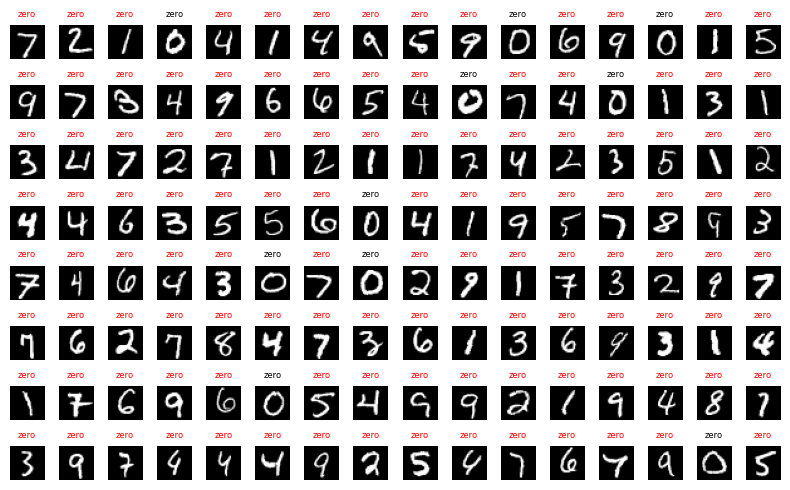

[Epoch 1] Test Loss: 0.1534, Accuracy: 95.30%
New best model found. Saving to ./model.pth...
[Epoch 2] Training Loss: 0.1451


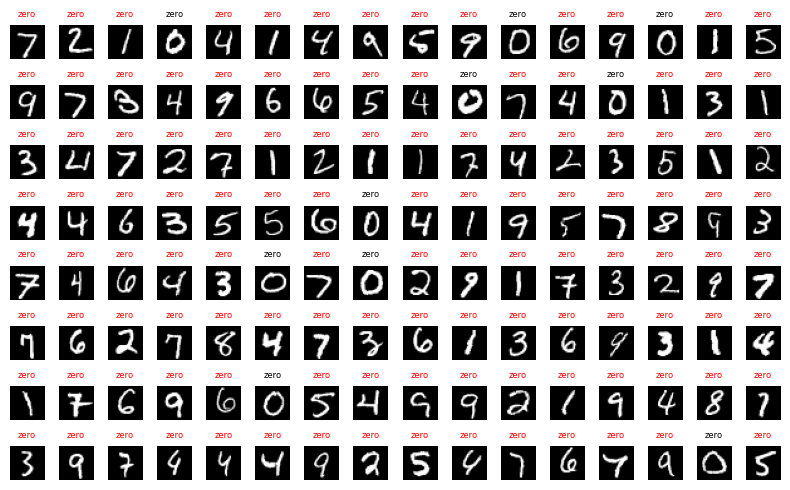

[Epoch 2] Test Loss: 0.1140, Accuracy: 96.42%
New best model found. Saving to ./model.pth...
[Epoch 3] Training Loss: 0.1034


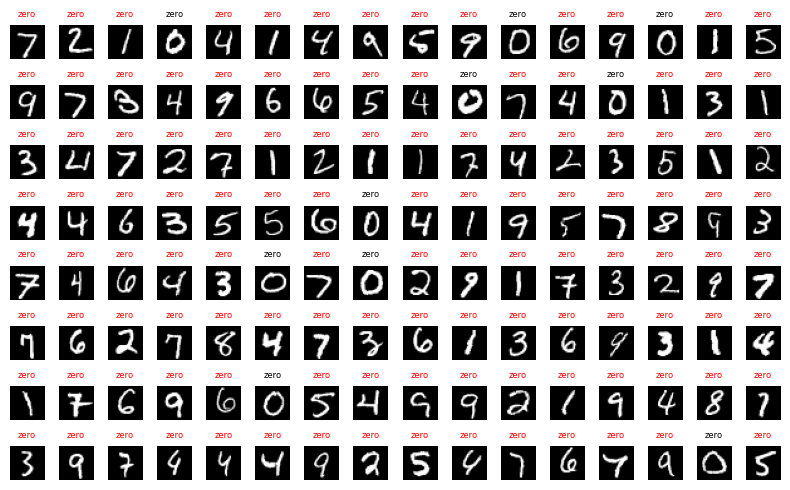

[Epoch 3] Test Loss: 0.0853, Accuracy: 97.39%
New best model found. Saving to ./model.pth...
[Epoch 4] Training Loss: 0.0867


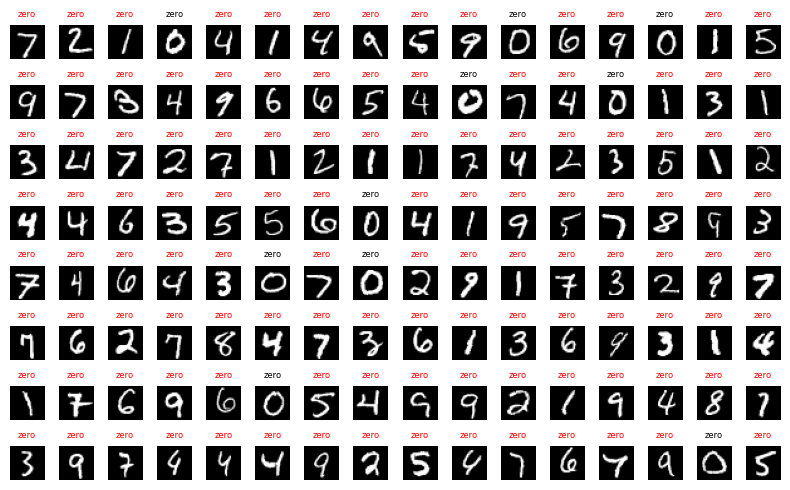

[Epoch 4] Test Loss: 0.0855, Accuracy: 97.32%
[Epoch 5] Training Loss: 0.0719


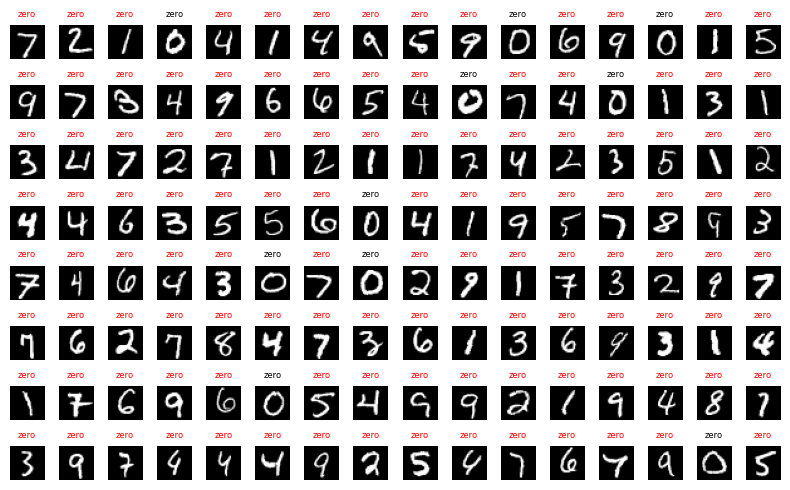

[Epoch 5] Test Loss: 0.0786, Accuracy: 97.56%
New best model found. Saving to ./model.pth...


In [80]:
import os

# Ensure the base directory exists
home_dir = './results'
if not os.path.exists(home_dir):
    os.makedirs(home_dir)

# Updated config with home_dir
config = {
    "home_dir": home_dir,  # Ensuring the home_dir exists
    "model_path": "./model.pth",
    "n_epochs": 5,
    "lr": 0.001
}

# Initialize and run the trainer
trainer = TransformerTrainer(config)
trainer.run()  # Achieve 85% accuracy on the test set as the benchmark
